In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import torch

# Montar Google Drive para acceder a los datos si es necesario
# from google.colab import drive
# drive.mount('/content/drive')

# Leer los datos
data = pd.read_csv('Bank_Register_update.csv', encoding='utf-8')
# data = pd.read_csv('./laptop_price.csv')

# Leer Datos
print(data)


      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     

In [6]:
# Convertir a matrices
X = np.array(data.iloc[:, [3,4,5,6,7,8,9,10,11,12]])
X = np.array(data.iloc[:, 3:13])

y = np.array(data.iloc[:, 13])

# Obtener el número de ejemplos de entrenamiento
m = y.size
print(m)


10000


In [7]:
# Función para normalizar características
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Llamar a featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)


In [8]:
# Función para normalizar características
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Llamar a featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)


In [9]:
# Agregar una columna de unos para el término de sesgo
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

# Función sigmoide
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g


In [10]:
# Función de costo y descenso de gradiente
def computeCost(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

def gradientDescent(theta, X, y, alpha, num_iters):
    m = y.size
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta -= (alpha / m) * X.T.dot(h - y)
        J_history.append(computeCost(theta, X, y))

    return theta, J_history


In [17]:
# Hiperparámetros para el descenso de gradiente
alpha = 0.0001
num_iters = 10000

# Inicializar theta
theta = np.zeros(11)

# Realizar el descenso de gradiente
theta, J_history = gradientDescent(theta, X_norm, y, alpha, num_iters)


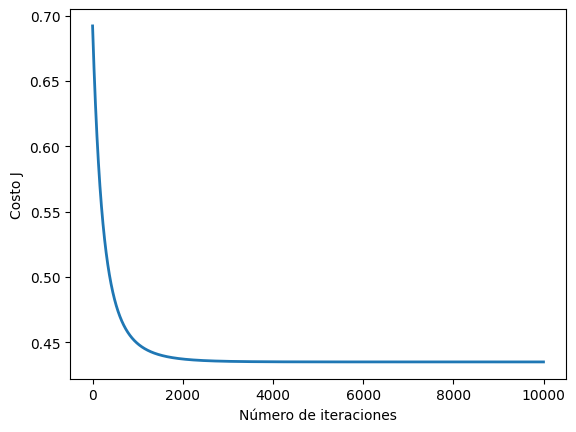

Theta calculado por el descenso de gradiente: [-1.63115696 -0.0638169   0.070524   -0.27037255  0.76282932 -0.04224442
  0.30983995 -0.02309396 -0.01272176 -0.53963705  0.02853643]


In [12]:
# Gráfica de la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

print('Theta calculado por el descenso de gradiente:', theta)


In [18]:
# Ajustar el tamaño de theta
theta = np.zeros(11)

# Predicción de probabilidad de dejar el banco
X_array = [1.0, 619.0, 0.0, 0.0, 42.0, 2.0, 0.0, 1.0, 1.0, 1.0, 101348.88]
X_array[1:11] = (X_array[1:11] - mu) / sigma
X_array = np.array(X_array)

# Predicción de probabilidad
prob = sigmoid(np.dot(X_array, theta))

# Mostrar la probabilidad
print(f"Un cliente con un balance de : {X_array[0]},\nLugar de Residencia : {X_array[1]},\nGénero : {X_array[2]},\nde edad : {X_array[3]} años,\ncon años de antigüedad : {X_array[4]} ,\ncon Balance de : {X_array[5]},\ncon Cantidad de Productos de Valor de : {X_array[6]},\ncontando con Tarjeta de Crédito : {X_array[7]},\nsiendo un cliente activo : {X_array[8]},\ncon un Salario Estimado de : {X_array[9]}\nTiene una probabilidad de : {prob} dejar el banco")


Un cliente con un balance de : 1.0,
Lugar de Residencia : -0.3262214220367463,
Género : -0.9018862432746051,
de edad : -1.0959875190286648 años,
con años de antigüedad : 0.2935174228967471 ,
con Balance de : -1.0417596792253108,
con Cantidad de Productos de Valor de : -1.2258476714090278,
contando con Tarjeta de Crédito : -0.9115834940401767,
siendo un cliente activo : 0.646091668153197,
con un Salario Estimado de : 0.9702425509371355
Tiene una probabilidad de : 0.5 dejar el banco
